In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option("display.max_column", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", None)
plt.style.use('fast')

In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")
geo = pd.read_csv("olist_geolocation_dataset.csv")
items= pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
category = pd.read_csv("product_category_name_translation.csv")

### Observations 

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [6]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
# Converting to datetime
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])

In [10]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [13]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [17]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [19]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [20]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [21]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [22]:
dataset = [customers,
             geo,
             items,
             payments,
             reviews,
             orders,
             products,
             sellers,
             category]

In [23]:
for df in dataset:
    print(df.isna().sum().sum()/len(df)/len(df.columns))

0.0
0.0
0.0
0.0
0.21006294560071873
0.00616948743476031
0.008254681193287003
0.0
0.0


In [24]:
for df in dataset:
    print(df.duplicated().sum())

0
261831
0
0
0
0
0
0
0


In [25]:
for df in dataset:
    print(df.index.duplicated().sum())

0
0
0
0
0
0
0
0
0


In [26]:
for df in dataset:
    print(df.nunique(axis=0).sum()/len(df)/len(df.columns))

0.43176758077654087
0.29235754572004763
0.3056470737429459
0.24753094738463316
0.48470128194791584
0.7110233706418881
0.13005506492805818
0.48263327948303714
1.0


In [27]:
for df in dataset:
    print(df.nunique(axis=1).sum()/len(df)/len(df.columns))

1.0
1.0
0.9999987318495974
0.9070269333692702
0.7896059133159028
0.9921900926177332
0.9470290903327838
1.0
0.9507042253521126


<AxesSubplot:title={'center':'10 states with most customers'}, ylabel='customer_state'>

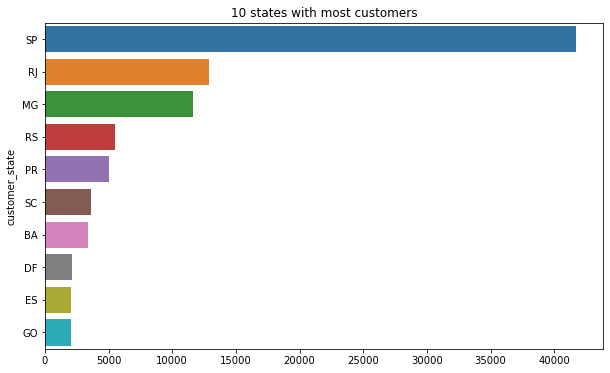

In [28]:
state = customers.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(10)
plt.figure(figsize=(10,6))
plt.title('10 states with most customers')
sns.barplot(x = state.values,
           y = state.index)

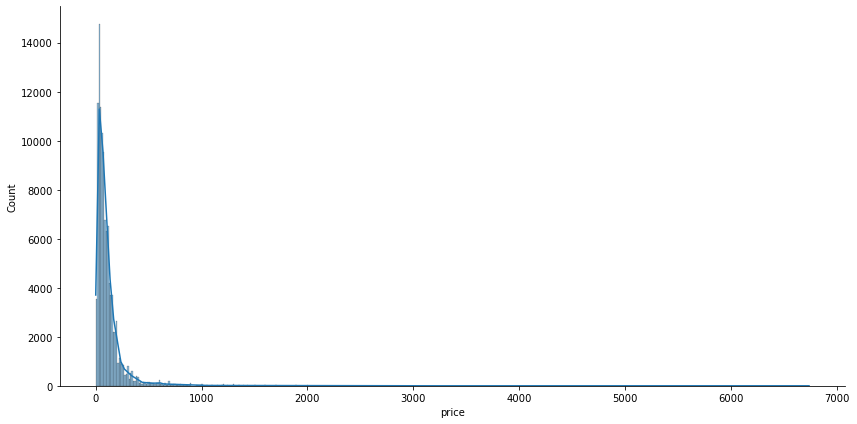

In [29]:
# Distribution of data price (variable skewed on the right, we can do a log tranformation)

sns.displot(data=items['price'],bins=500, kde=True, height=6,aspect=2)

In [30]:
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [31]:
items['price'] = items['price'][items['price'] > 0]
items['price'] = np.log(items['price'])

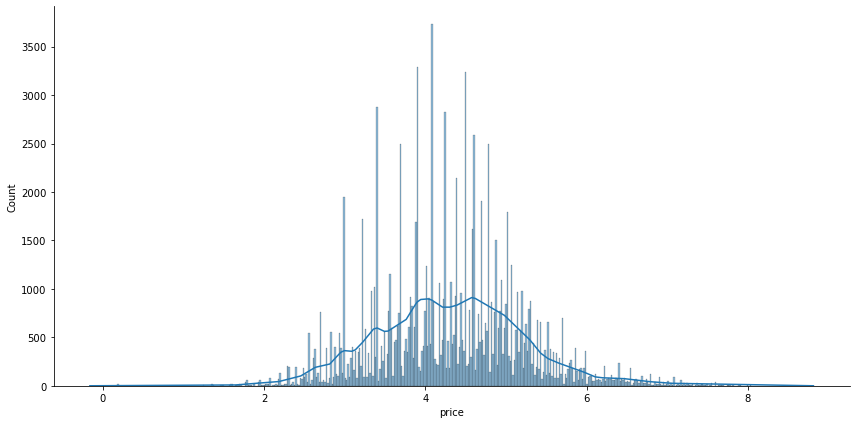

In [32]:
sns.displot(data=items['price'],bins=500, kde=True, height=6,aspect=2)

In [33]:
items['freight_value'] = items['freight_value'][items['freight_value'] > 0]
items['freight_value'] = np.log(items['freight_value'])

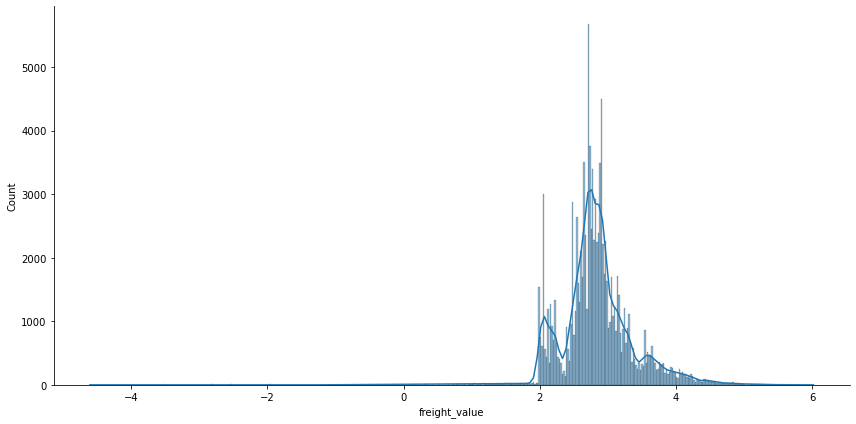

In [34]:
sns.displot(data=items['freight_value'],bins=500, kde=True, height=6,aspect=2)

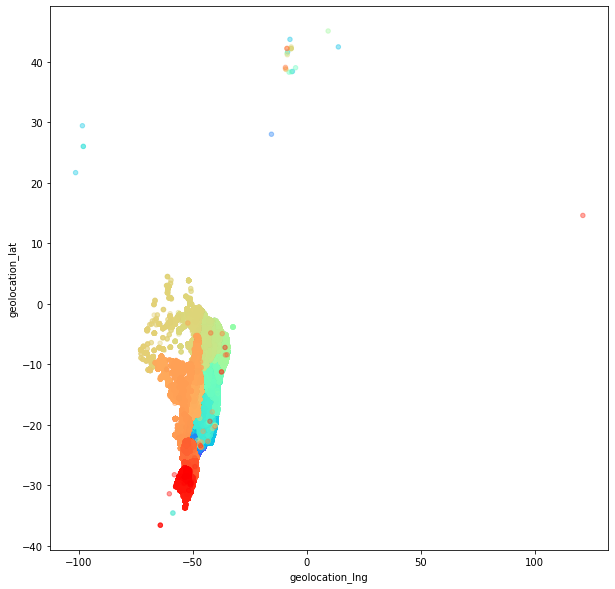

In [35]:
geo.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap=plt.get_cmap("rainbow"), colorbar=False, figsize=(10, 10))
plt.show()

In [36]:
# Removing outliers with map
geo = geo[geo.geolocation_lat <= 5.3]
geo = geo[geo.geolocation_lng >= -74]
geo = geo[geo.geolocation_lat >= -33.7]
geo = geo[geo.geolocation_lng <= -34.8]

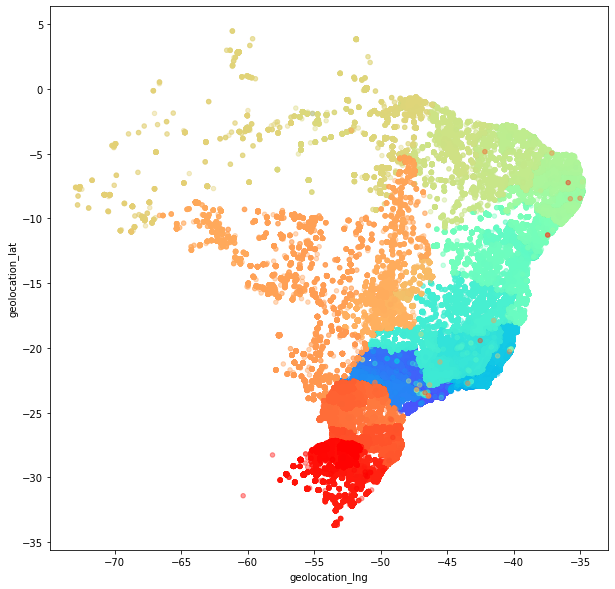

In [37]:
geo.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap=plt.get_cmap("rainbow"), colorbar=False, figsize=(10, 10))
plt.show()

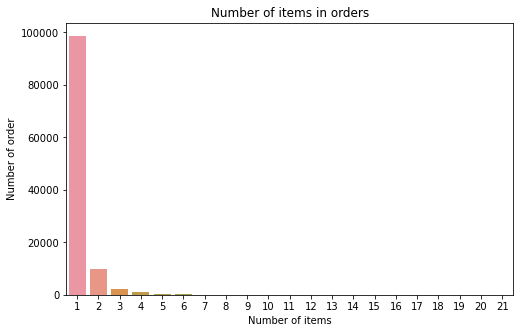

In [38]:
# Number of items in orders
x = list(items["order_item_id"].value_counts().index)
y = items["order_item_id"].value_counts().values
plt.figure(figsize=(8, 5))
plt.title("Number of items in orders")
plt.xlabel("Number of items")
plt.ylabel("Number of order")
sns.barplot(x, y)
plt.show()

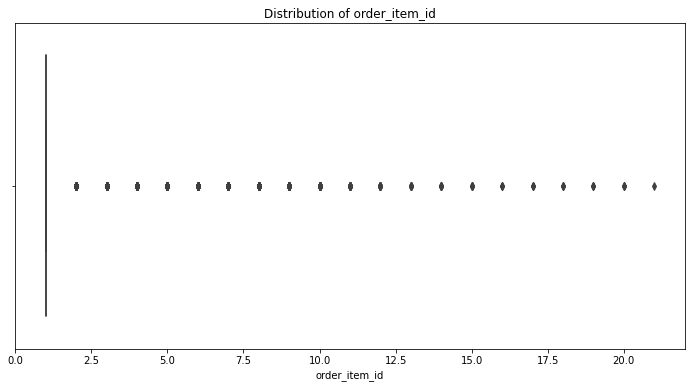

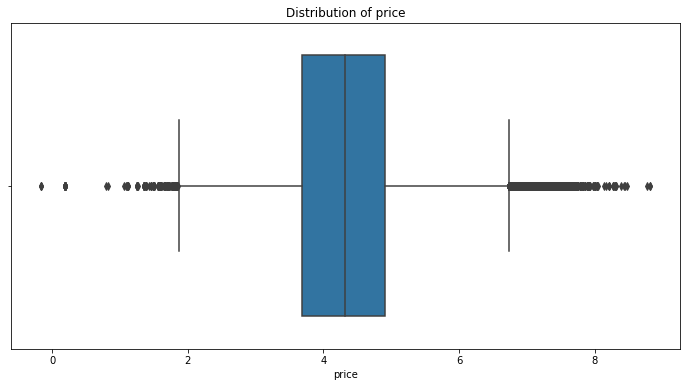

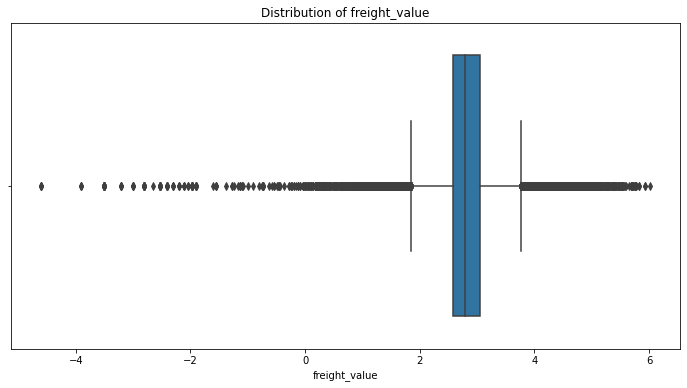

In [39]:
for column in items.select_dtypes(['number', 'float64', 'int64']).columns:
    plt.figure(figsize=(12,6))
    plt.title('Distribution of ' + column)
    sns.boxplot(items[column].dropna())

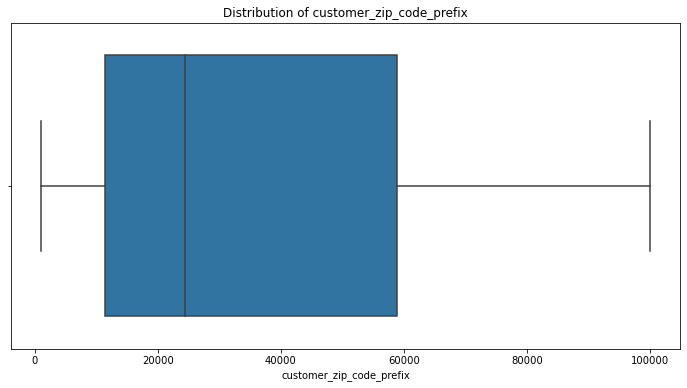

In [40]:
for column in customers.select_dtypes(['number', 'float64', 'int64']).columns:
    plt.figure(figsize=(12,6))
    plt.title('Distribution of ' + column)
    sns.boxplot(customers[column].dropna())

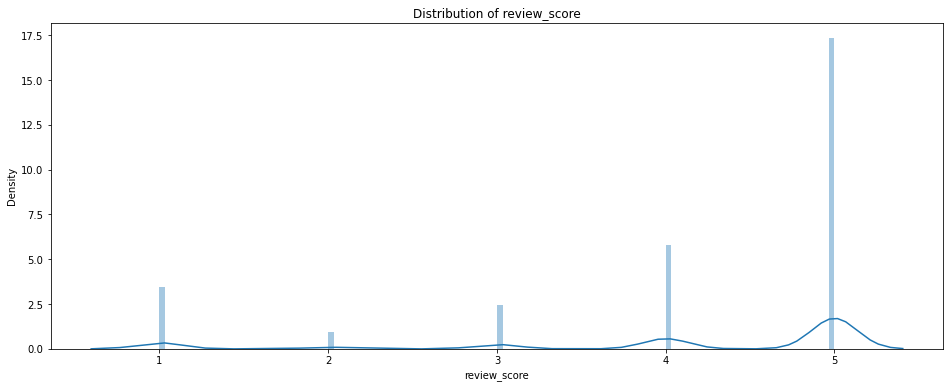

In [41]:
for column in reviews.select_dtypes(['number', 'bool', 'float64', 'int64']).columns:
    plt.figure(figsize=(16,6))
    plt.title('Distribution of ' + column)
    sns.distplot(reviews[column].dropna(), bins=120)
    plt.autoscale()
    plt.show()

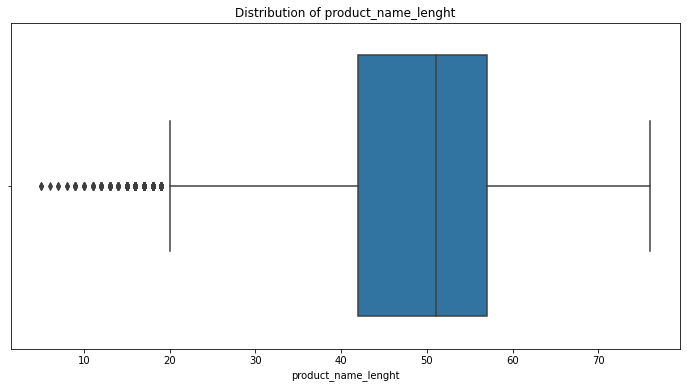

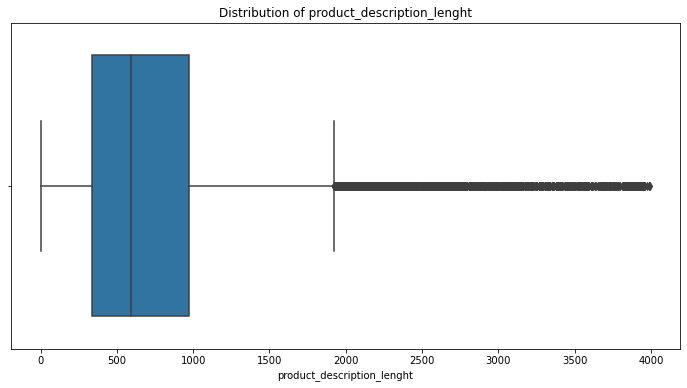

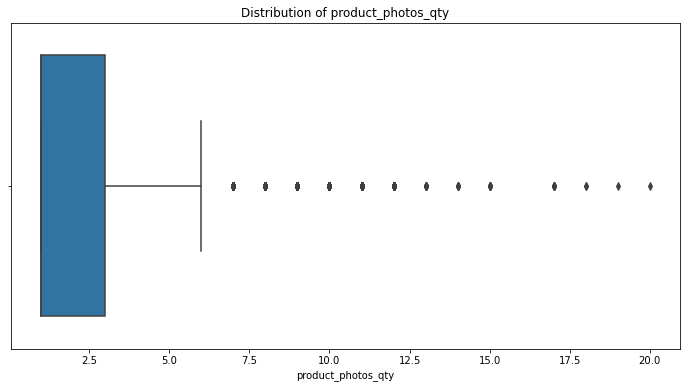

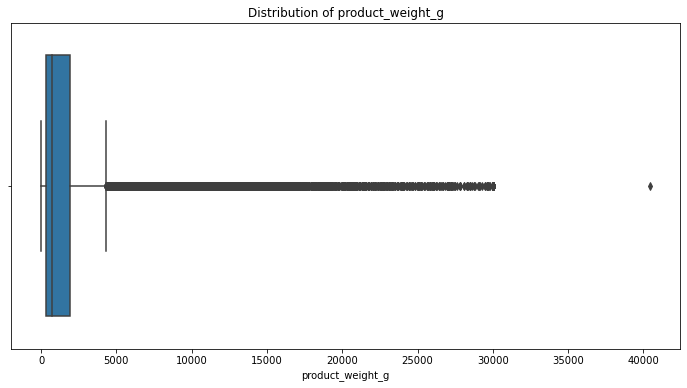

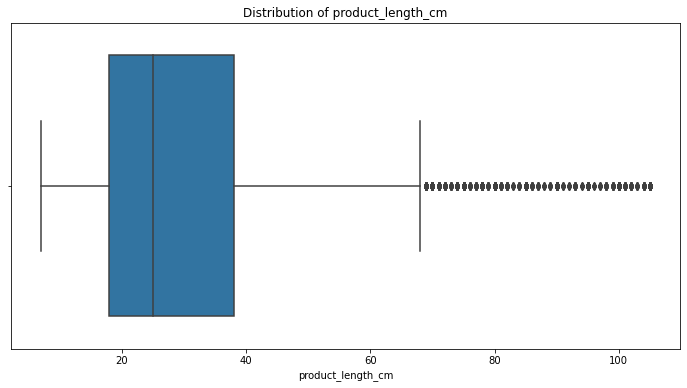

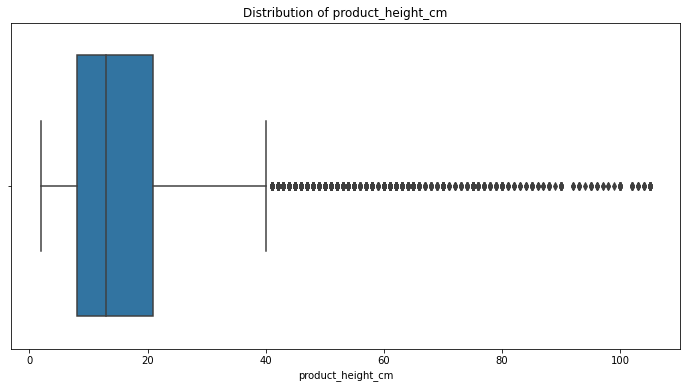

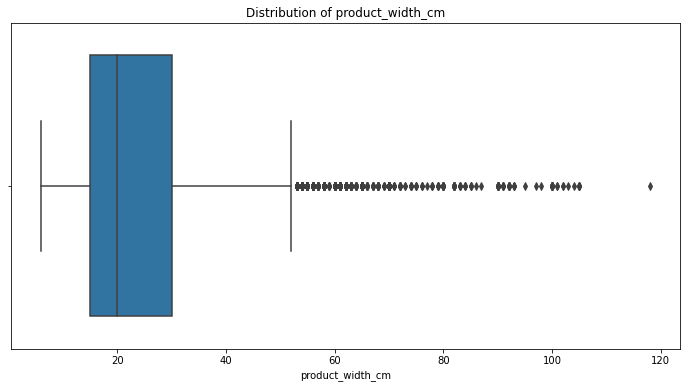

In [42]:
for column in products.select_dtypes(['number', 'float64', 'int64']).columns:
    plt.figure(figsize=(12,6))
    plt.title('Distribution of ' + column)
    sns.boxplot(products[column].dropna())

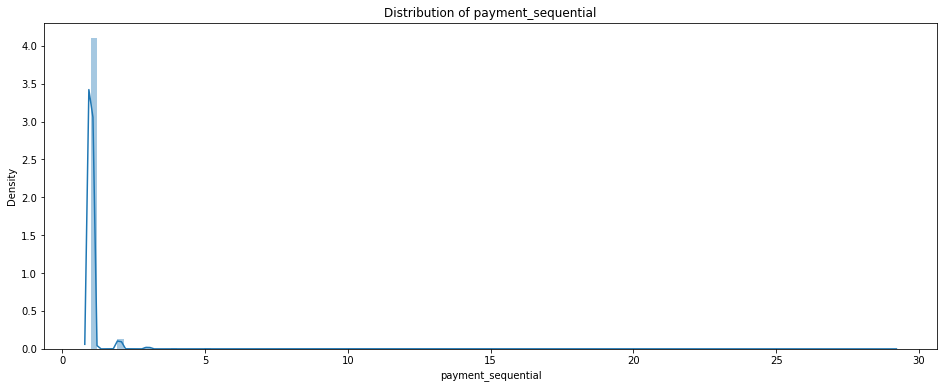

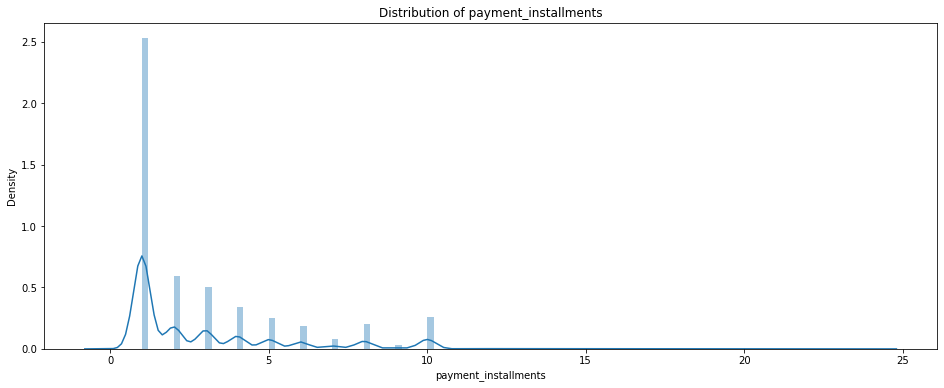

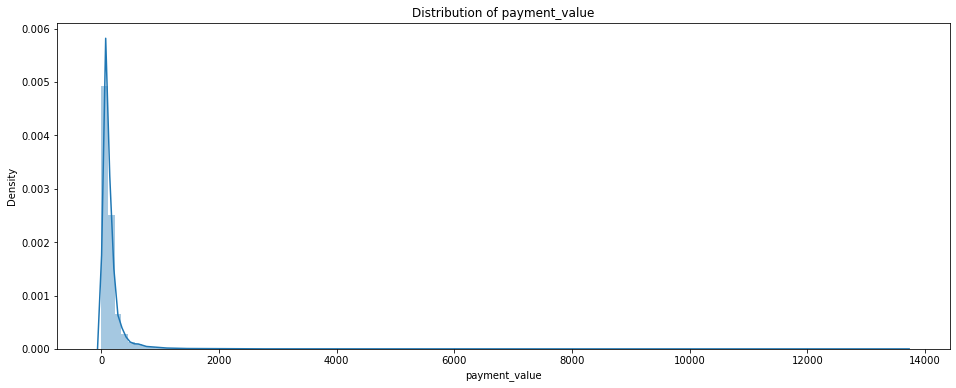

In [43]:
for column in payments.select_dtypes(['number', 'bool', 'float64', 'int64']).columns:
    plt.figure(figsize=(16,6))
    plt.title('Distribution of ' + column)
    sns.distplot(payments[column].dropna(), bins=120)
    plt.autoscale()
    plt.show()

In [44]:
# Number of values per payment type
payments["payment_type"].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [45]:
# I delete payment type "not_defined"
payments["payment_type"] = payments["payment_type"].astype("category")
payments["payment_type"] = payments["payment_type"].cat.remove_categories("not_defined")

In [46]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   order_id              103886 non-null  object  
 1   payment_sequential    103886 non-null  int64   
 2   payment_type          103883 non-null  category
 3   payment_installments  103886 non-null  int64   
 4   payment_value         103886 non-null  float64 
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 3.3+ MB


<AxesSubplot:title={'center':'Numbers of payment type'}, ylabel='payment_type'>

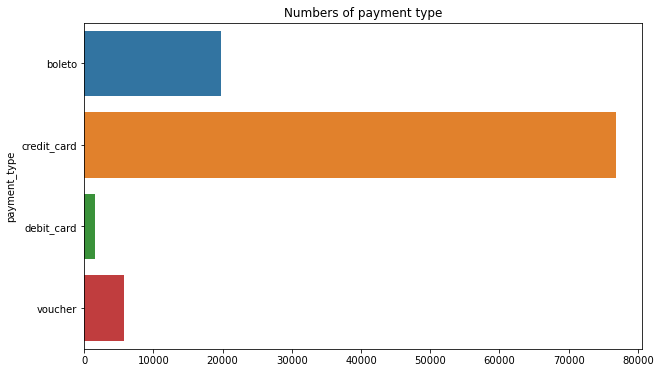

In [47]:
payment = payments.groupby(['payment_type']).count().sort_values(
    by='order_id', ascending=True)['order_id']
plt.figure(figsize=(10,6))
plt.title('Numbers of payment type')
sns.barplot(x = payment.values, y = payment.index)

In [48]:
orders['order_purchase_timestamp'].max()

'2018-10-17 17:30:18'

In [49]:
orders['order_purchase_timestamp'].min()

'2016-09-04 21:15:19'

In [50]:
orders['order_id'].nunique()

99441

In [51]:
customers['customer_unique_id'].nunique()

96096

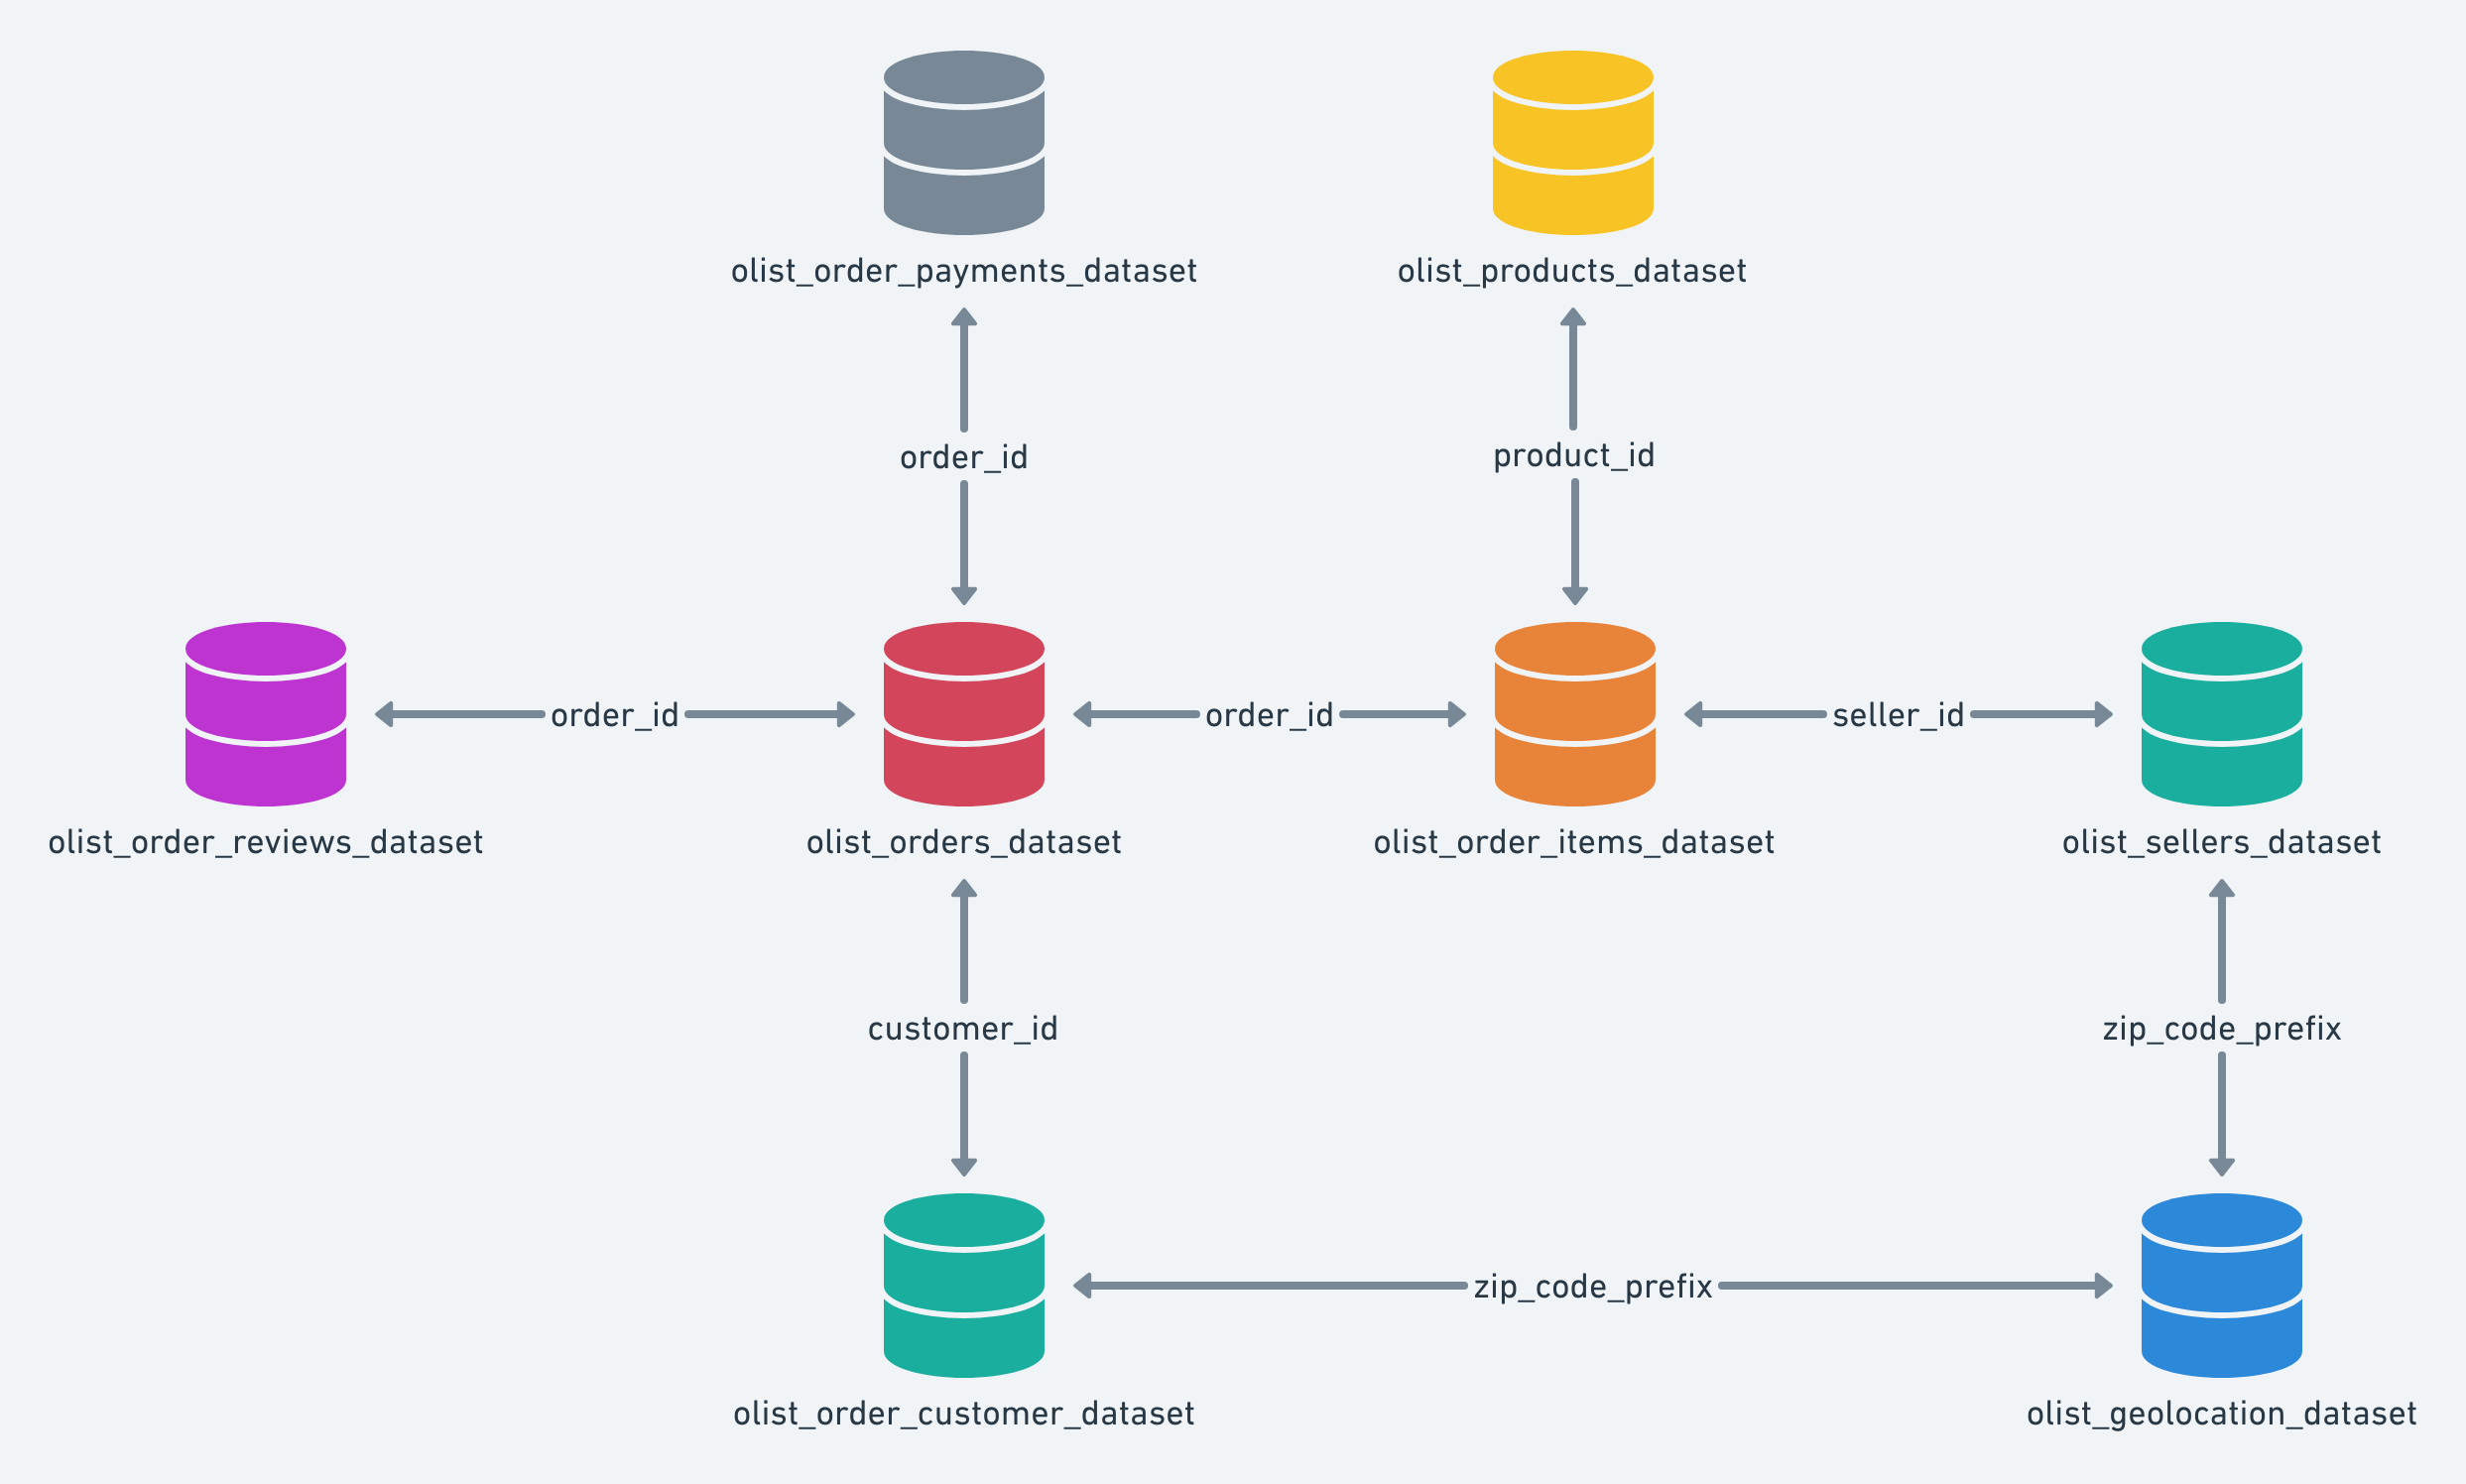

In [52]:
# renaming
sellers["geolocation_zip_code_prefix"] = sellers["seller_zip_code_prefix"]
geo["customer_zip_code_prefix"] = geo["geolocation_zip_code_prefix"]

geo.drop_duplicates(subset=["geolocation_zip_code_prefix"],
                   keep="first", inplace=True)
# Fusion of sellers and geo dataframes by the "geolocation_zip_code_prefix" column
sellers = pd.merge(sellers, geo, how="right", on="geolocation_zip_code_prefix")   

# Merge orders and reviews dataframes by common column 'order_id'
orders = pd.merge(orders, reviews, how='left', on='order_id')
orders = pd.merge(orders, payments, how='left', on='order_id')

# Fusion of customer data with geographical data
customers = pd.merge(customers, geo, how='left',
                     on="customer_zip_code_prefix")

# Fusion of orders and customers dataframes by the common column 'customer_id'
orders = pd.merge(orders, customers, how="left", on="customer_id")

# Merging item and product dataframes by common column 'product_id'
products = pd.merge(items, products, how='left', on="product_id")

# Merge orders and products by column 'order_id'
data = pd.merge(orders, products, how='left', on='order_id')

# Added categories to all purchases
data = pd.merge(data, category, how='left', on="product_category_name")

# Remove column 'product_category_name'
data.drop(columns='product_category_name', inplace=True)

# Renaming some variables
data.rename(columns={"geolocation_lat": "customer_lat",
                   "geolocation_lng": "customer_lng",
                   "product_category_name_english": "product_category_name"},
          inplace=True)

In [53]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,customer_lat,customer_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,3.400864,2.165619,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,3.400864,2.165619,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,3.400864,2.165619,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,4.776599,3.125005,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,5.074549,2.955951,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


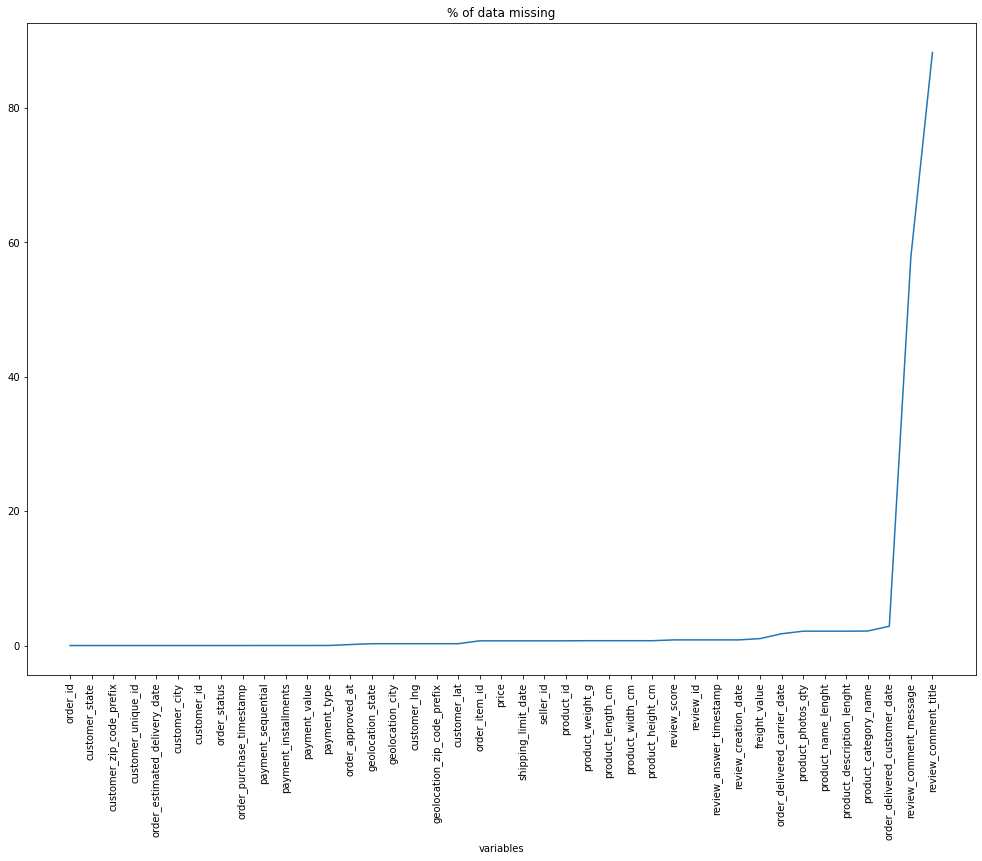

In [54]:
# percentage of nan for each column of data
df_missing = data.isna().sum().sort_values()/len(data)*100

fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
degrees = 90
plt.xticks(rotation=degrees)
plt.title('% of data missing')
plt.xlabel('variables')
plt.plot(df_missing)

In [55]:
# Delete rows containing only null values
data.dropna(axis=0, inplace=True, how='all')
# Remove duplicate lines
data.drop_duplicates(inplace=True)
# delete irrelevant variable "review_comment_message" and "geolocation_zip_code_prefix"
data.drop(["review_comment_message"], axis=1, inplace=True)
data.drop(["customer_zip_code_prefix"], axis=1, inplace=True)

In [56]:
# I delete columns with >80% NaN et 100% Nan
# data = data.loc[:, data.isnull().mean() < .8]
data = data.loc[:, data.isnull().sum() < 0.8*data.shape[0]]

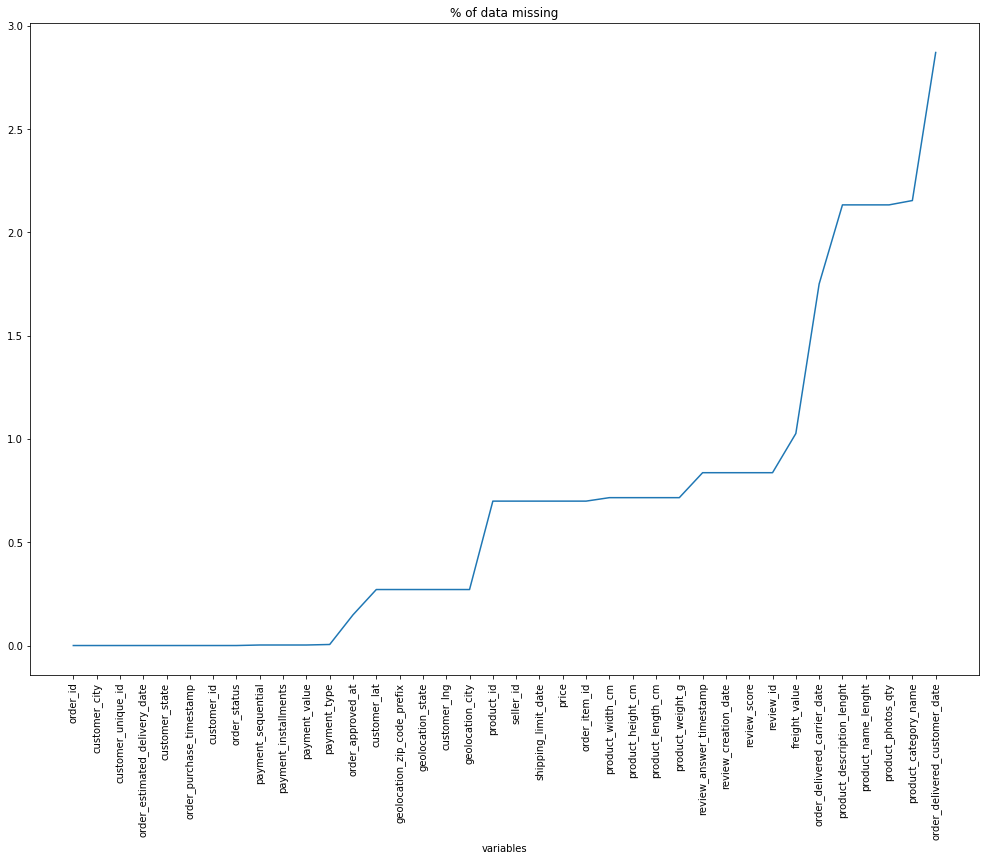

In [57]:
# percentage of nan for each column of data
df_missing = data.isna().sum().sort_values()/len(data)*100

fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
degrees = 90
plt.xticks(rotation=degrees)
plt.title('% of data missing')
plt.xlabel('variables')
plt.plot(df_missing)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  object        
 4   order_approved_at              118966 non-null  object        
 5   order_delivered_carrier_date   117057 non-null  object        
 6   order_delivered_customer_date  115722 non-null  object        
 7   order_estimated_delivery_date  119143 non-null  object        
 8   review_id                      118146 non-null  object        
 9   review_score                   118146 non-null  float64       
 10  review_creation_date           118146 non-null  object        
 11  

In [59]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,geolocation_zip_code_prefix,customer_lat,customer_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,3.400864,2.165619,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,3.400864,2.165619,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,3.400864,2.165619,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,4.776599,3.125005,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,5.074549,2.955951,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


## Corrélation et feature engineering

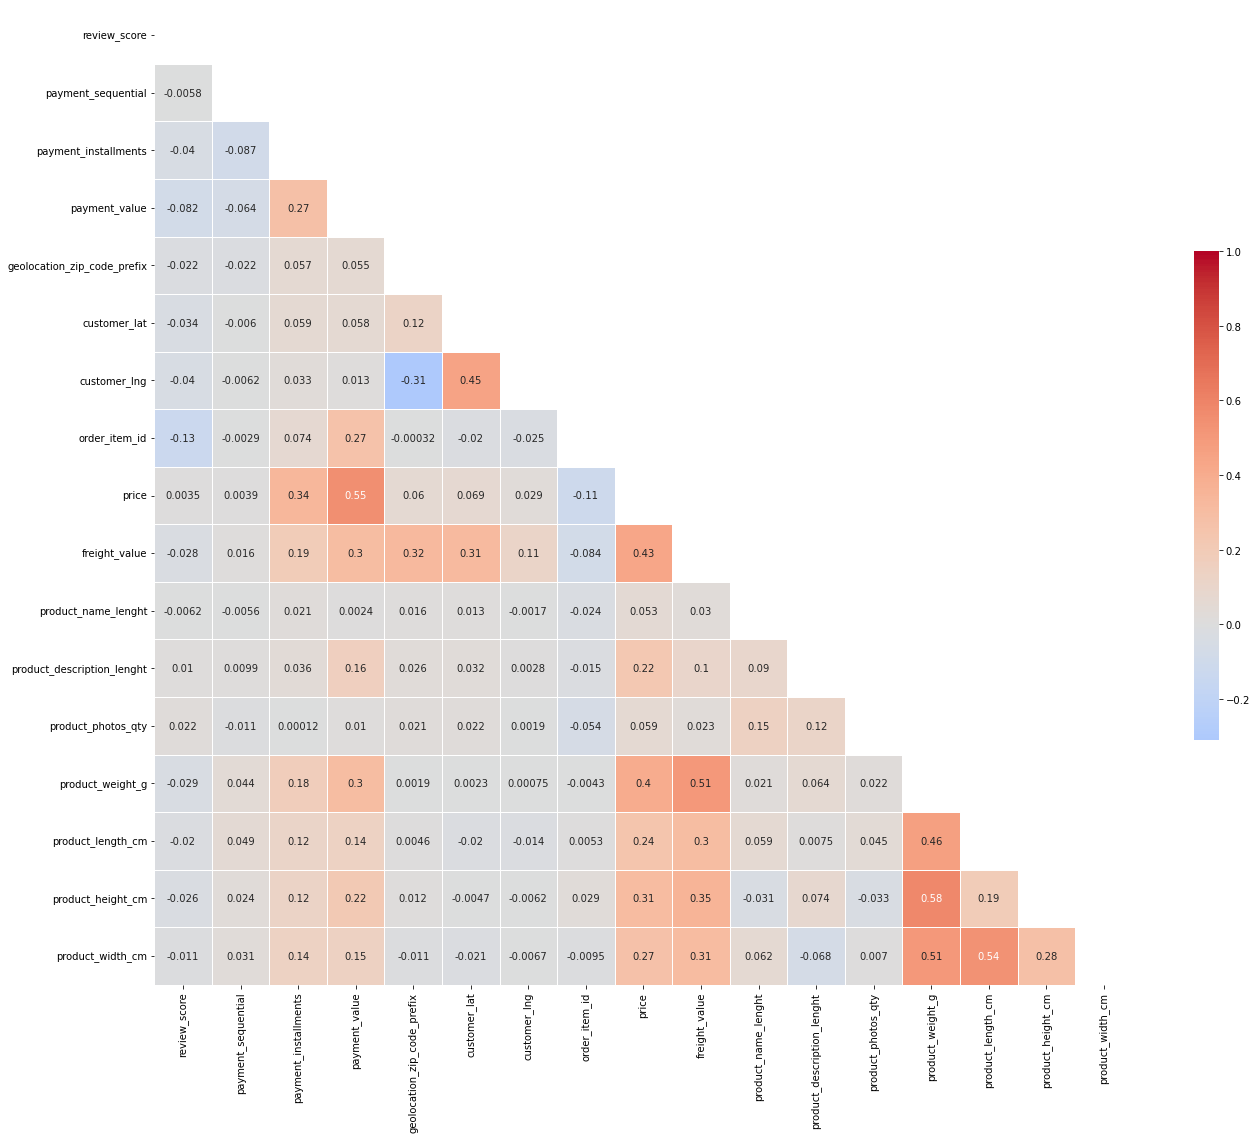

In [60]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5});

In [61]:
# Volume variable creation
data['volume'] = data['product_length_cm'] * \
data['product_height_cm'] * data['product_width_cm']

In [62]:
# List of columns to convert to datetime
columns_to_convert_to_datetime = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp',
]

# Converting dtype to datetime features
for column_name in columns_to_convert_to_datetime:
    data[column_name] = pd.to_datetime(data[column_name])

# variable delivery_time creation
data['delivery_time'] = data['order_delivered_customer_date'] \
    - data['order_approved_at']
data['delivery_time'] = data['delivery_time'] \
    .dt.total_seconds() / 86400

# variable estimated_delivery_time creation
data['estimated_delivery_time'] = data['order_estimated_delivery_date'] \
    - data['order_approved_at']
data['estimated_delivery_time'] = data['estimated_delivery_time'] \
    .dt.total_seconds() / 86400

# variable approval_time creation
data['approval_time'] = data['order_approved_at'] \
    - data['order_purchase_timestamp']
data['approval_time'] = data['approval_time'] \
    .dt.total_seconds() / 86400

data["purchase_year"] = data["order_purchase_timestamp"].map(lambda d: d.year)
data["purchase_month"] = data["order_purchase_timestamp"].map(lambda d: d.month)

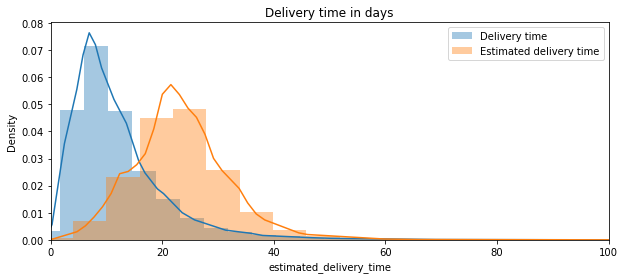

In [63]:
# Delivery estimated time and actual delivery time
plt.figure(figsize=(10, 4))
plt.title("Delivery time in days")
sns.distplot(data['delivery_time'].dropna(), label='Delivery time')
sns.distplot(data['estimated_delivery_time'].dropna(), label='Estimated delivery time')
plt.legend()
plt.xlim([0, 100])
plt.show()

<AxesSubplot:title={'center':' 10 cities with most customers'}, ylabel='customer_city'>

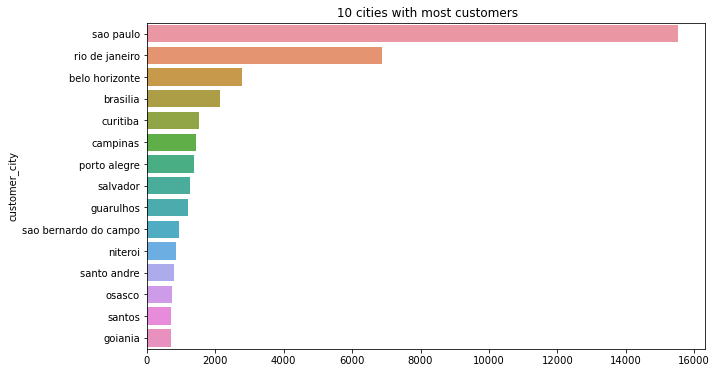

In [64]:
cities = customers.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
plt.title(' 10 cities with most customers')
sns.barplot(x = cities.values,
           y = cities.index)

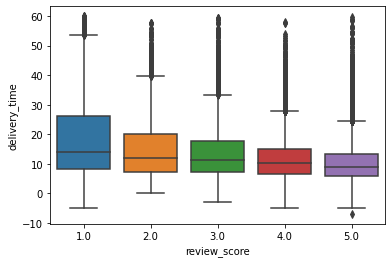

In [65]:
# Boxplot of delivery time for each score
sns.boxplot(x="review_score", y="delivery_time",
            data=data[data["delivery_time"] < 60])
plt.show()

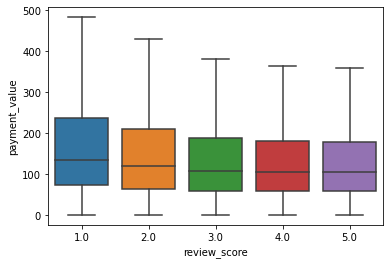

In [66]:
# Boxplot of payment value for each score
sns.boxplot(x="review_score", y="payment_value", data=data, showfliers=False)
plt.show()

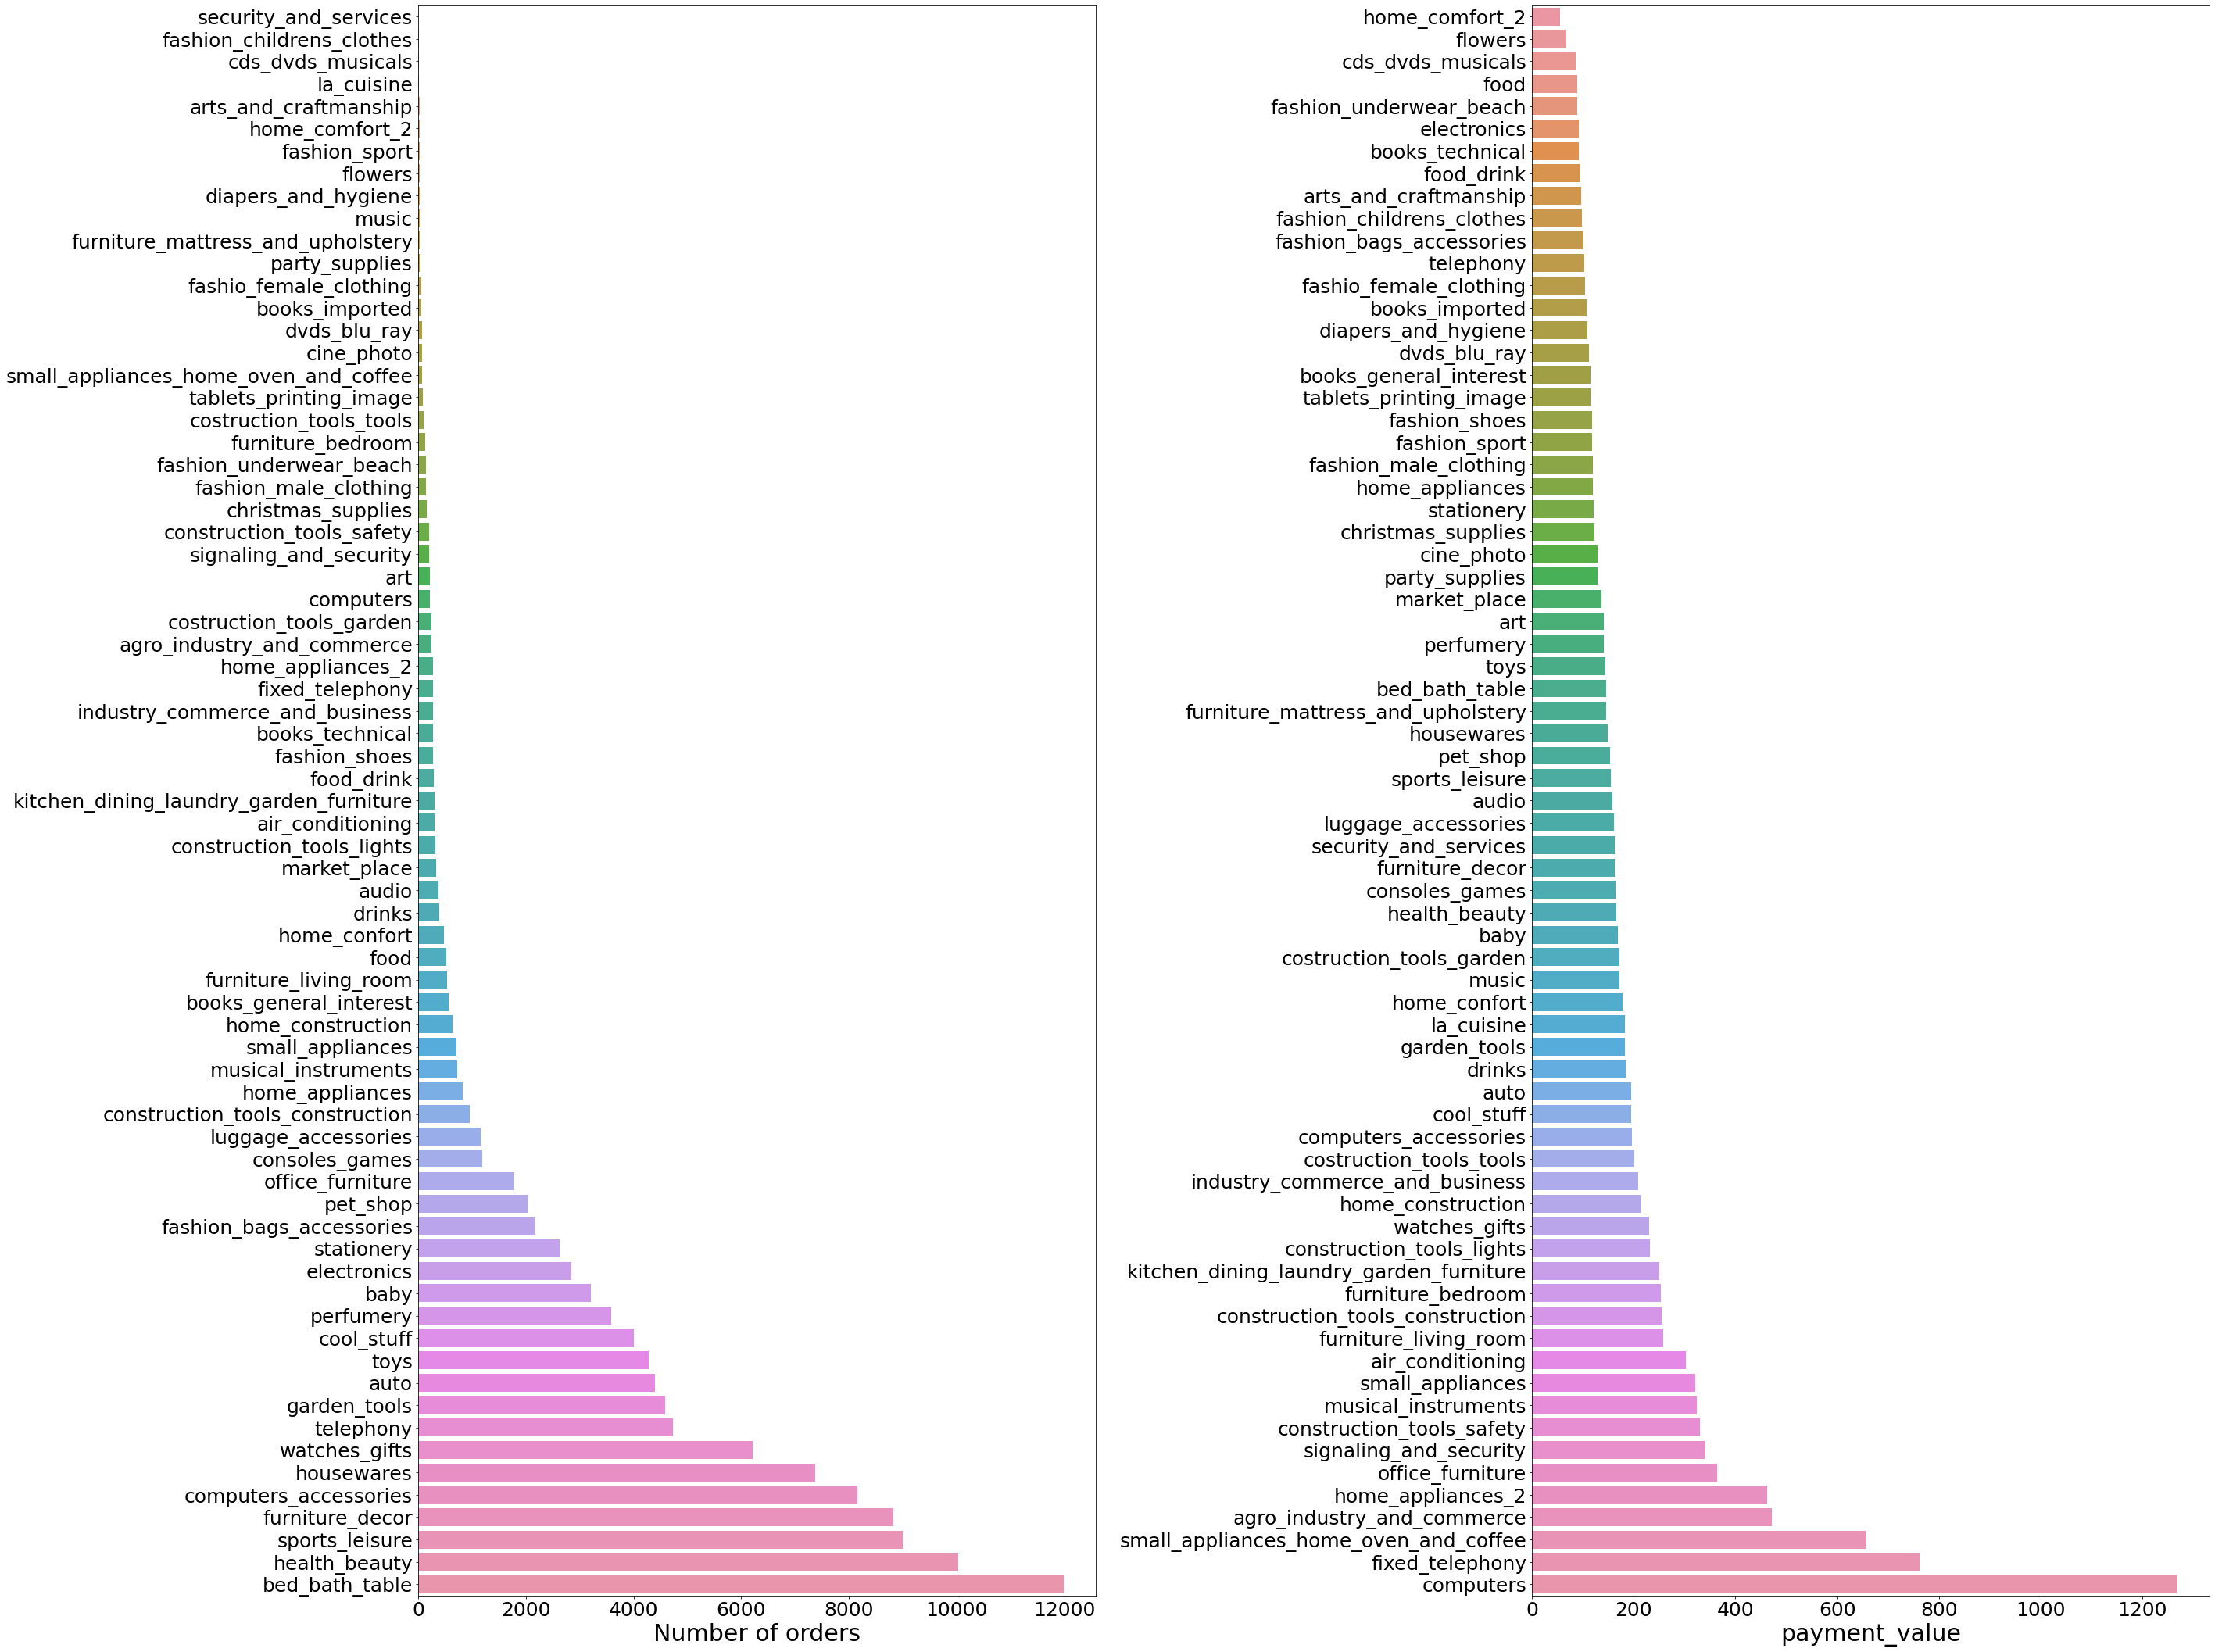

In [67]:
# Number of products per product category
products_count = data['product_category_name'].value_counts().sort_values()

# Average payment for each product category
products_value = data.groupby("product_category_name")["payment_value"].mean().sort_values()

# List of categories
fig = plt.figure(1, figsize=(40, 30))
# Number of products purchased per category
plt.subplot(121)
sns.barplot(products_count.values, list(products_count.index))
plt.xlabel("Number of orders", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# Average payment by product category
plt.subplot(122)
sns.barplot(products_value, list(products_value.index))
plt.xlabel("payment_value", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
fig.tight_layout(pad=3.0)
plt.show()

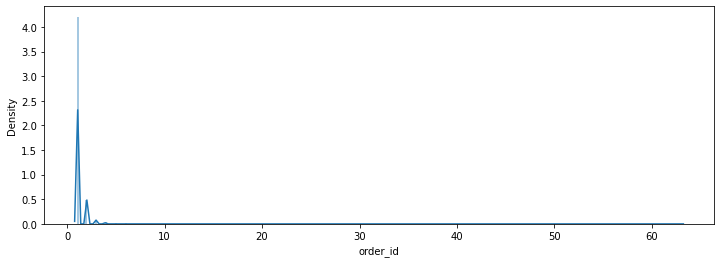

In [68]:
#Nombre de commandes achetés par client
plt.figure(figsize=(12,4))
sns.distplot(data.groupby('customer_id')['order_id'].count(), bins=300)
plt.show()

In [69]:
test = data.groupby('customer_id')['order_id'].count()
test

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffecc9f79fd8c764f843e9951b11341    3
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    2
ffffe8b65bbe3087b653a978c870db99    1
Name: order_id, Length: 99441, dtype: int64

In [70]:
test.describe()

count    99441.000000
mean         1.198128
std          0.751055
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         63.000000
Name: order_id, dtype: float64

In [71]:
a=data.drop_duplicates(subset = ["customer_unique_id", "order_id"]).groupby(["customer_unique_id"]).count()
len(a[a["order_id"]>1]) / len(a) *100

3.1187562437562435

In [72]:
a=data.drop_duplicates(subset = ["customer_unique_id", "order_id"]).groupby(["customer_unique_id"]).agg({
    "order_id":"size"
}).value_counts()
a/a.sum()*100

order_id
1           96.881244
2            2.856518
3            0.211247
4            0.031219
5            0.008325
6            0.006244
7            0.003122
9            0.001041
17           0.001041
dtype: float64

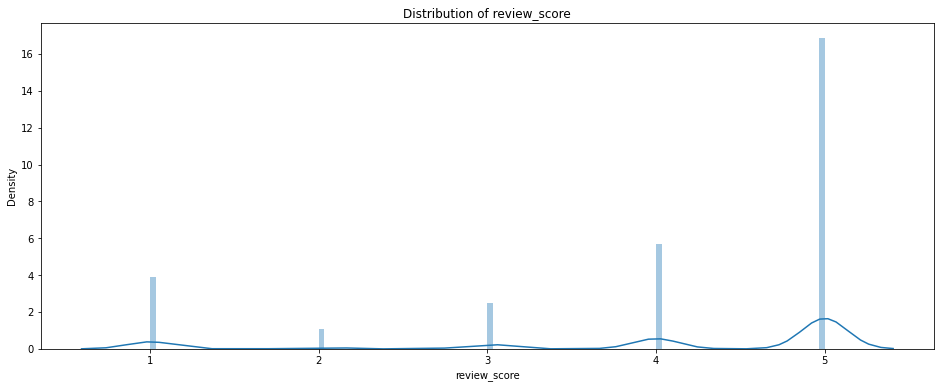

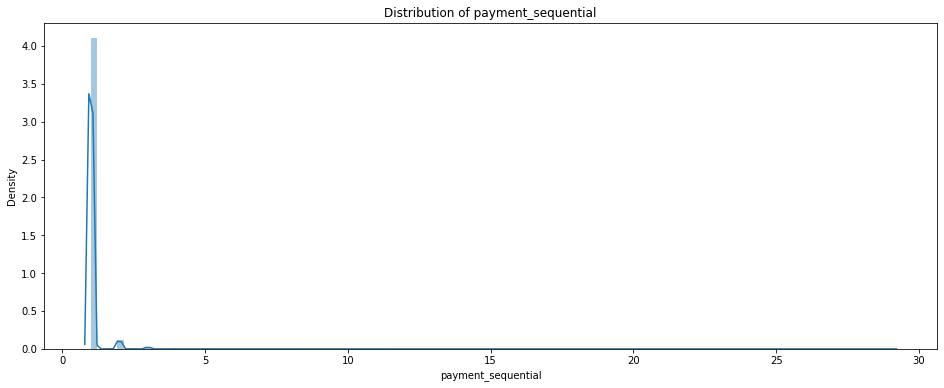

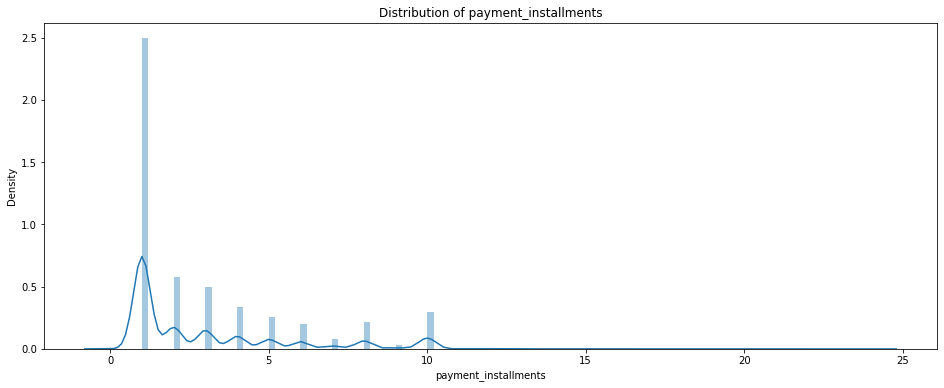

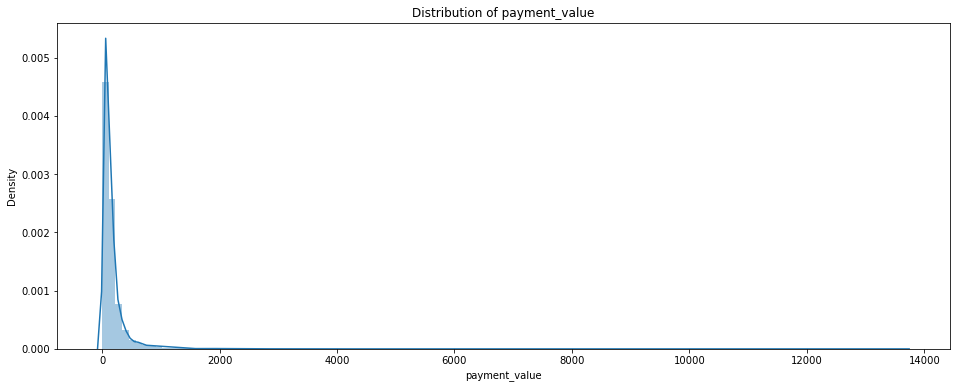

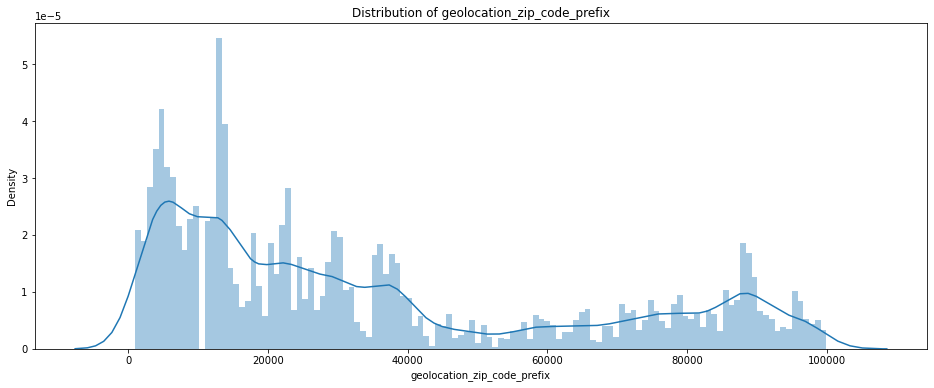

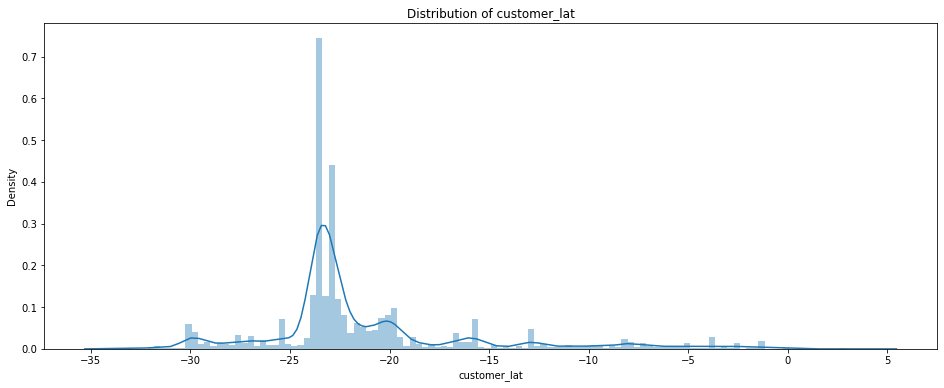

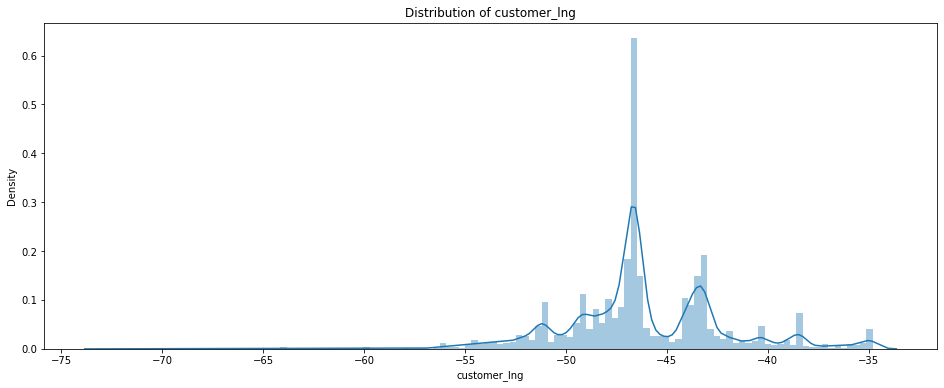

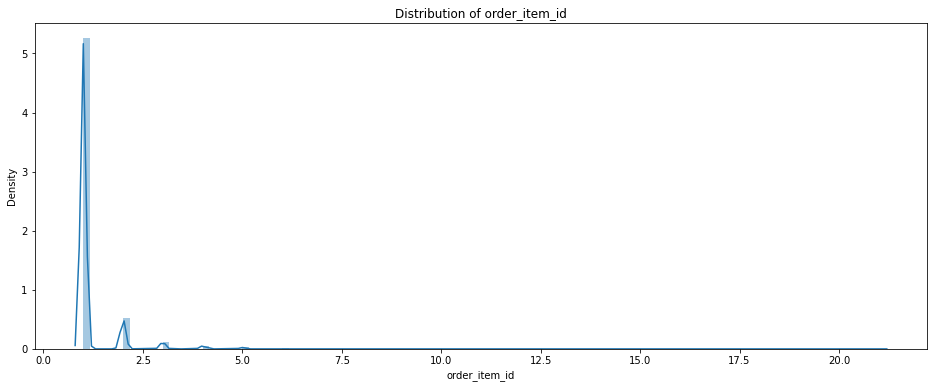

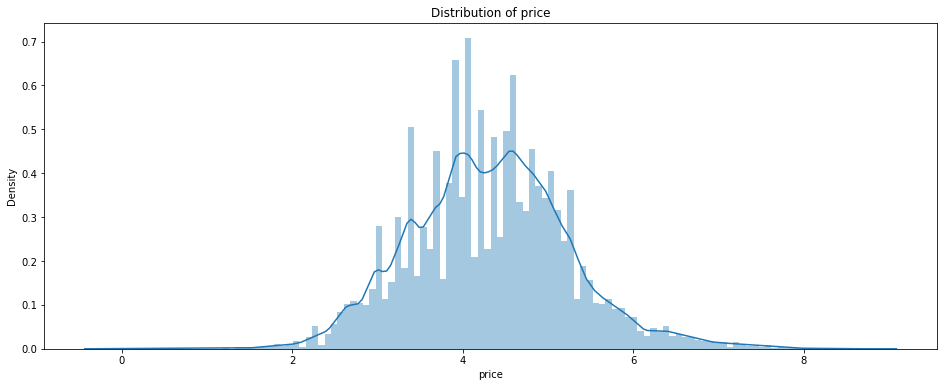

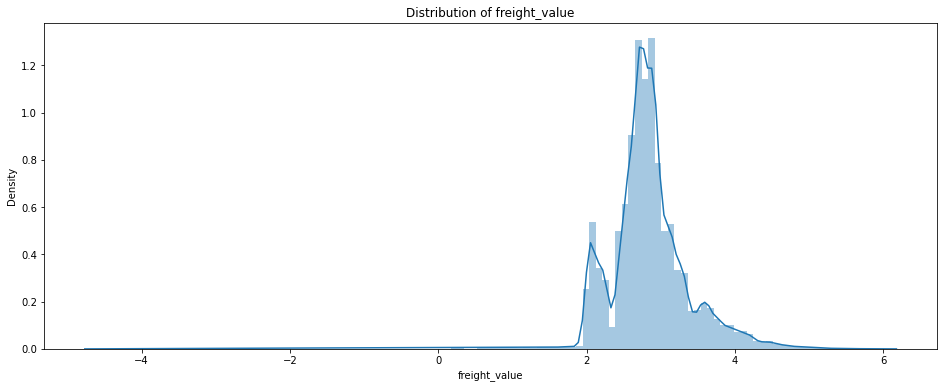

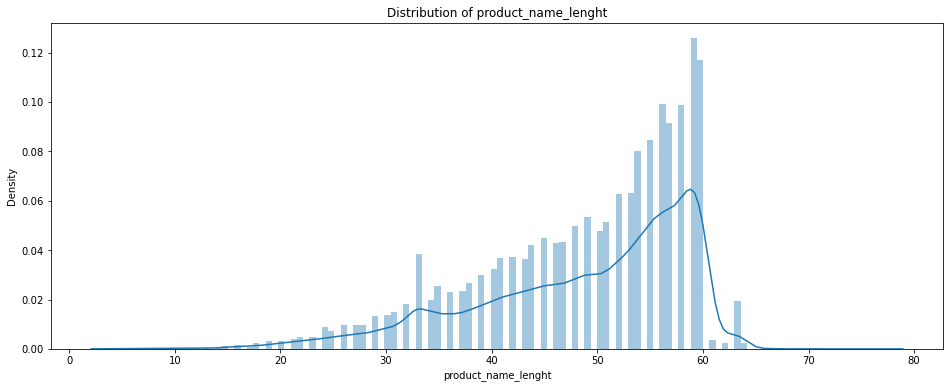

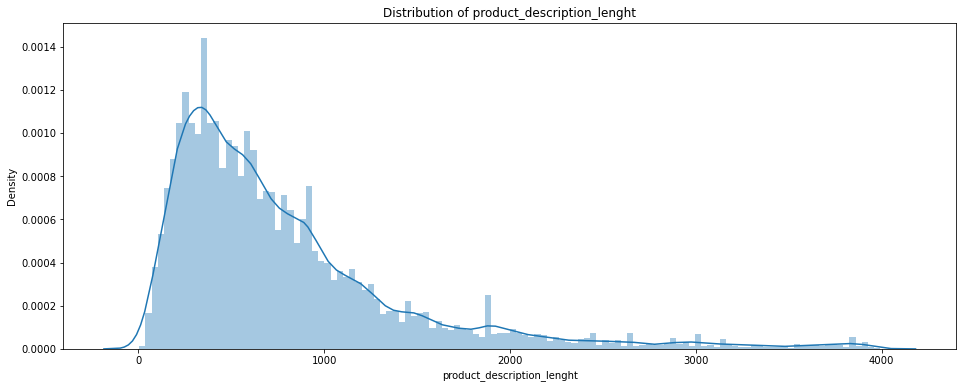

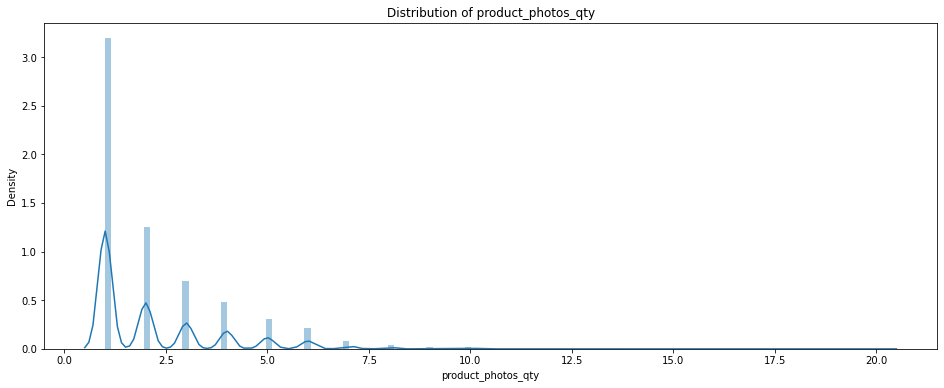

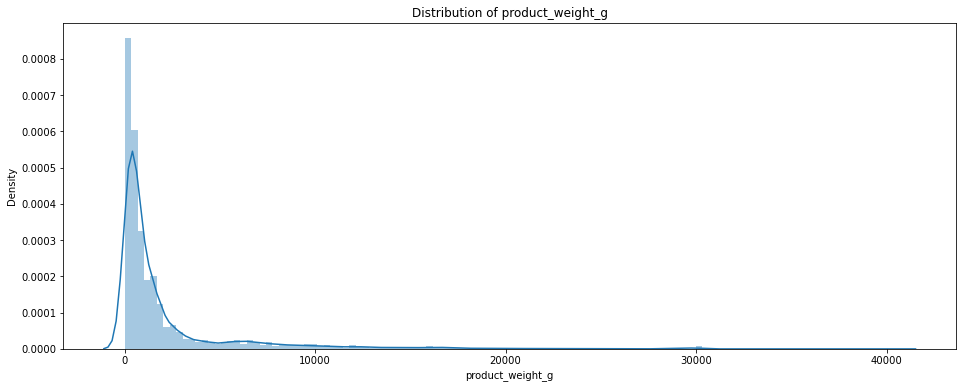

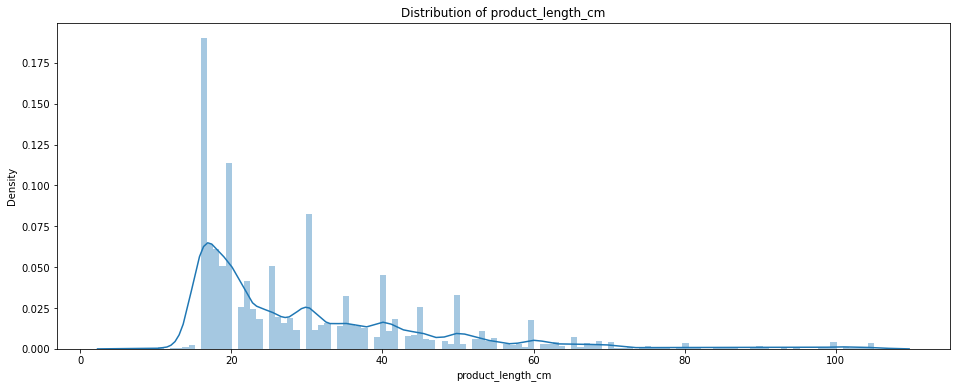

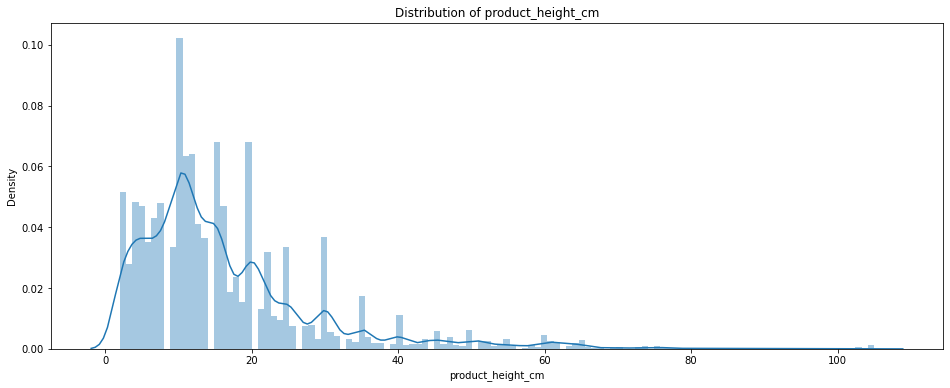

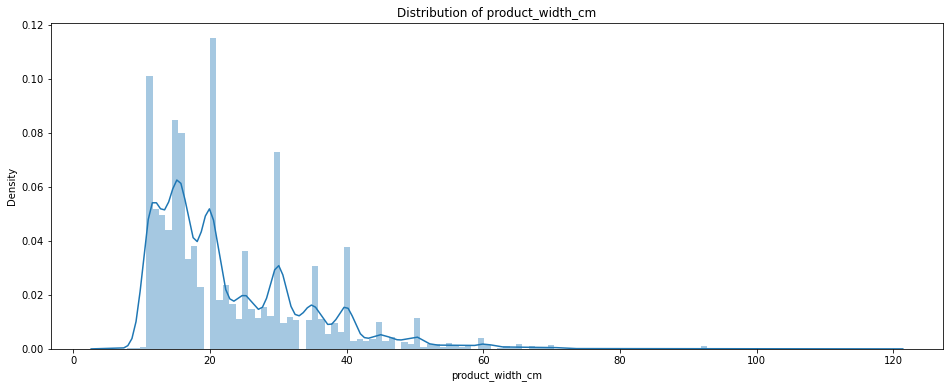

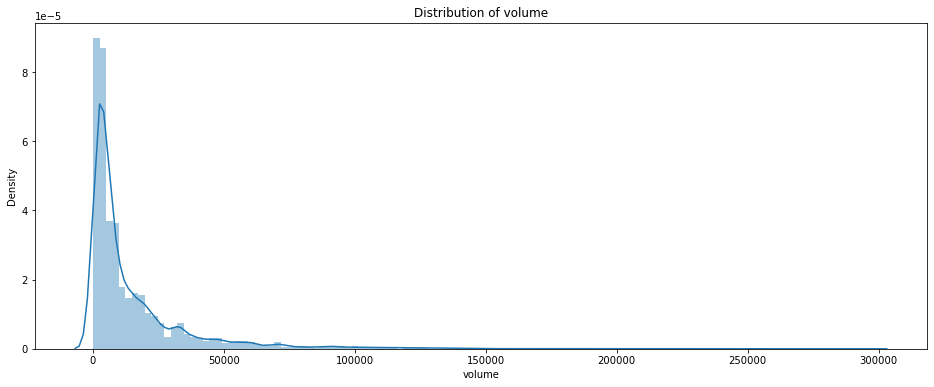

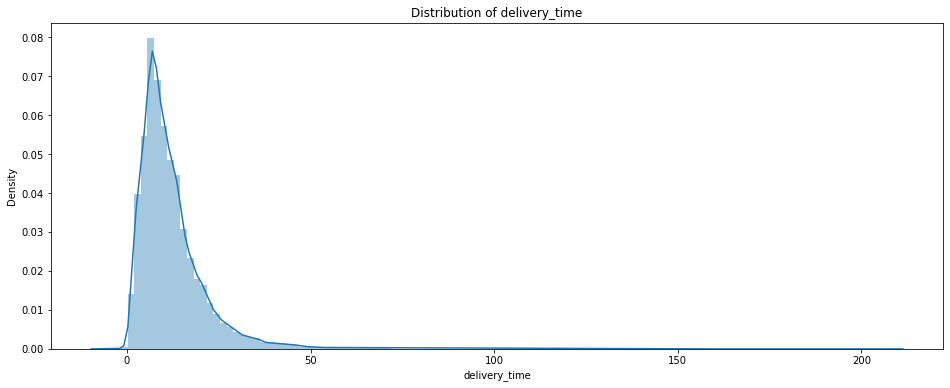

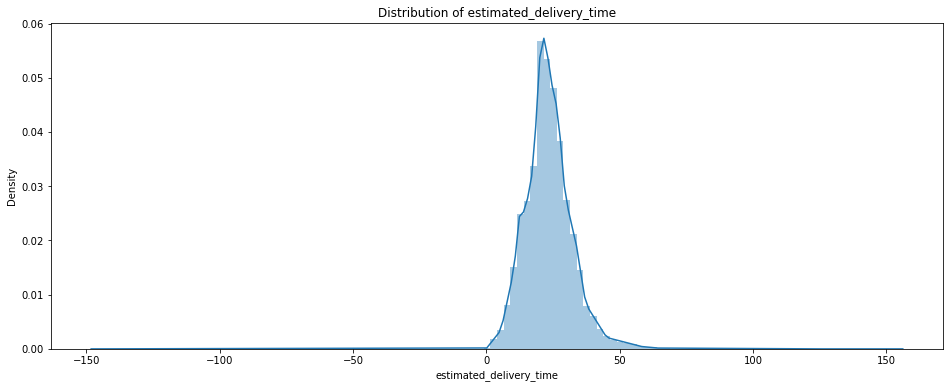

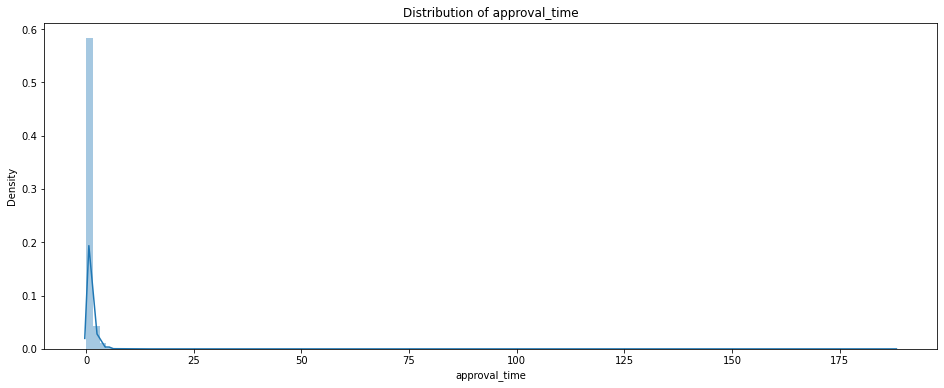

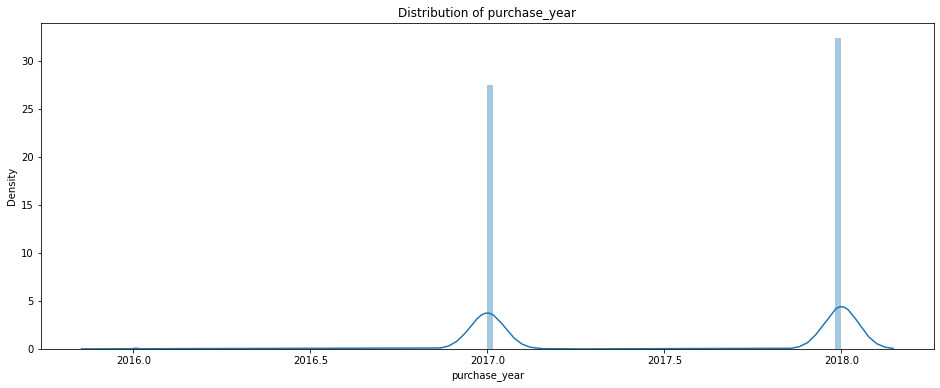

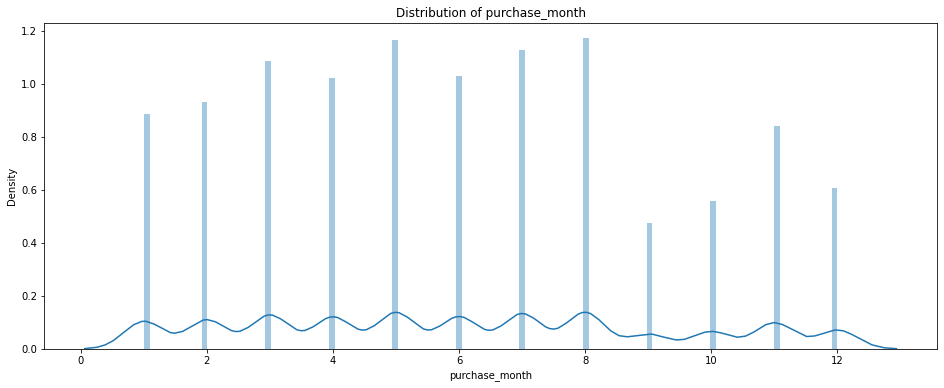

In [73]:
for column in data.select_dtypes(['number', 'bool', 'float64', 'int64']).columns:
    plt.figure(figsize=(16,6))
    plt.title('Distribution of ' + column)
    sns.distplot(data[column].dropna(), bins=120)
    plt.autoscale()
    plt.show()

In [74]:
# Export of dataset
data.to_csv('clean_dataset.csv')

## Conclusion :

    _ Les csv ont été mergés
    _ Nettoyage
    _ Analyse uni/multi variée
    _ Les articles les plus vendus "ameublement, multimédia, équipement de sport, décoration". Les articles les plus                chère "produits électroniques"
    _ Les notes de reviews sont un peu meilleurs sur les produits pas chers
    _ Les délais estimés sont plus longs que les délais de livraison
    _ Très peu de clients ont fait plus d'un achat (3%)
    _ "price" et "freight" transformation log